# EasyOCRを試してみる
[EasyOCR](https://github.com/JaidedAI/EasyOCR)がどれくらいの精度なのかを色々な画像で実験してみる  
EasyOCRは[矩形の4端の座標, テキスト, 確信度]のリストを返すが、可視化するために画像上に矩形を表示する&テキストを表示する処理を実装した  
入力画像および出力画像は`out`ディレクトリ以下に配置している

## ライブラリのインポート

In [1]:
from PIL import Image, ImageDraw, ImageFont
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

## EasyOCRの準備

In [2]:
import easyocr
reader = easyocr.Reader(['ja','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## 定数の定義

In [3]:
FONT_PATH = '/Library/Fonts/AppleGothic.ttf'
LINE_WIDTH = 6
FONT_SIZE = 30

## utils

In [4]:
def tuple_lists(xy_list):
    return tuple([tuple(xy) for xy in xy_list])

In [5]:
def get_top_left_xy(xy_list):
    top_left_xt_index = np.array([x + y for x, y in xy_list]).argmin()
    return xy_list[top_left_xt_index]

In [6]:
def make_filename(file_path, suffix):
    return '.'.join(file_path.split('/')[-1].split('.')[:-1]) + suffix

## 画像を読み込む関数

In [7]:
def open_im(image_path):
    if (image_path[-3:] in ['png', 'PNG']):
        png_im = Image.open(image_path)
        png_im.load()
        im = Image.new('RGB', png_im.size, (255, 255, 255))
        im.paste(png_im, mask=png_im.split()[3])
    else:
        im = Image.open(image_path)
    origin_im = im.copy()
    detect_im = im.copy()
    text_im = im.copy()
    del im
    
    origin_im.save('out/' + make_filename(image_path, '.original.jpg'), quality=95)
    plt.imshow(np.array(origin_im))

    return origin_im, detect_im, text_im

## 画像の上に矩形を描写する関数

In [8]:
def draw_detect(detect_im, results, image_path):
    draw = ImageDraw.Draw(detect_im)
    for result in results:
        draw.line(tuple_lists(result[0] + [result[0][0]]), fill='red', width=LINE_WIDTH)

    detect_im.save('out/' + make_filename(image_path, '.detect.jpg'), quality=95)
    plt.imshow(np.array(detect_im))

## 画像の上にテキストを描写する関数

In [9]:
def draw_text(text_im, results, image_path):
    draw = ImageDraw.Draw(text_im)
    font = ImageFont.truetype(FONT_PATH, FONT_SIZE)
    for result in results:
        draw.polygon(tuple_lists(result[0]), fill=(255, 255, 255), outline=(0, 0, 0))
        draw.text(tuple(get_top_left_xy(result[0])), result[1], font=font, fill=(0, 0, 0))

    text_im.save('out/' + make_filename(image_path, '.text.jpg'), quality=95)
    plt.imshow(np.array(text_im))

    with open('out/' + make_filename(image_path, '.text.txt'), 'w') as f:
        for result in results:
            f.write(f"{result[1]}  {result[2]}\n")

## 実験

### example画像

In [10]:
IMAGE_PATH='images/japanese.jpg'

In [11]:
results = reader.readtext(IMAGE_PATH)

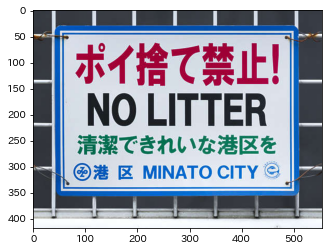

In [12]:
origin_im, detect_im, text_im = open_im(IMAGE_PATH)

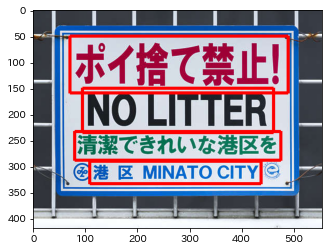

In [13]:
draw_detect(detect_im, results, IMAGE_PATH)

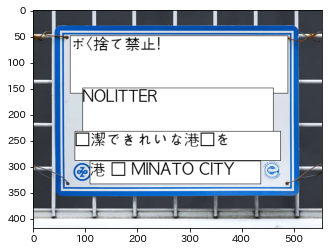

In [14]:
draw_text(text_im, results, IMAGE_PATH)

### カレーは飲み物

In [15]:
IMAGE_PATH = 'images/test1.JPG'

In [16]:
results = reader.readtext(IMAGE_PATH)

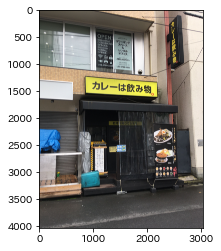

In [17]:
origin_im, detect_im, text_im = open_im(IMAGE_PATH)

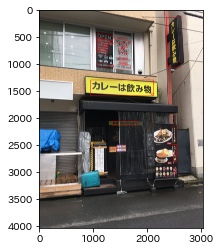

In [18]:
draw_detect(detect_im, results, IMAGE_PATH)

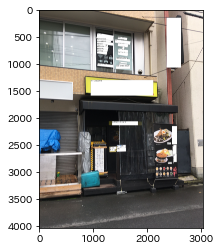

In [19]:
draw_text(text_im, results, IMAGE_PATH)

### カルボナーラのレシピ

In [20]:
IMAGE_PATH = 'images/test2.PNG'

In [21]:
results = reader.readtext(IMAGE_PATH)

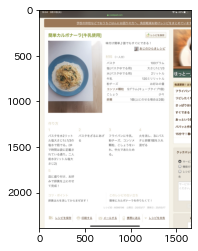

In [22]:
origin_im, detect_im, text_im = open_im(IMAGE_PATH)

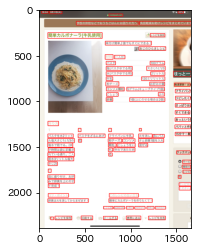

In [23]:
draw_detect(detect_im, results, IMAGE_PATH)

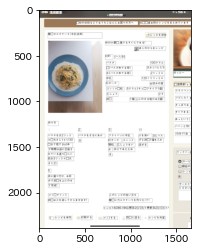

In [24]:
draw_text(text_im, results, IMAGE_PATH)

### 吾輩は猫である 手書き

In [25]:
IMAGE_PATH = 'images/test4.jpg'

In [26]:
results = reader.readtext(IMAGE_PATH)

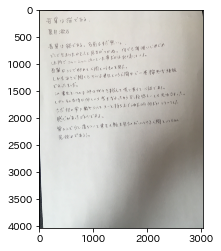

In [27]:
origin_im, detect_im, text_im = open_im(IMAGE_PATH)

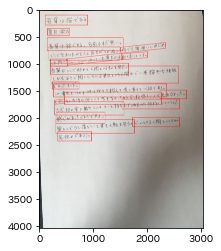

In [28]:
draw_detect(detect_im, results, IMAGE_PATH)

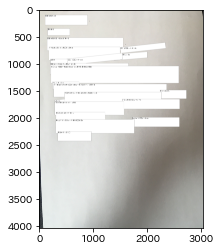

In [29]:
draw_text(text_im, results, IMAGE_PATH)

### 吾輩は猫である デジタル1

In [30]:
IMAGE_PATH = 'images/test5.png'

In [31]:
results = reader.readtext(IMAGE_PATH)

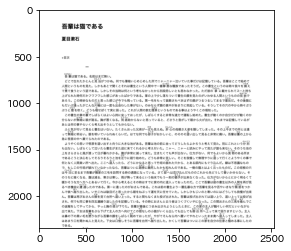

In [32]:
origin_im, detect_im, text_im = open_im(IMAGE_PATH)

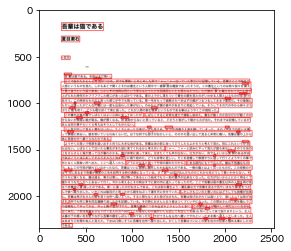

In [33]:
draw_detect(detect_im, results, IMAGE_PATH)

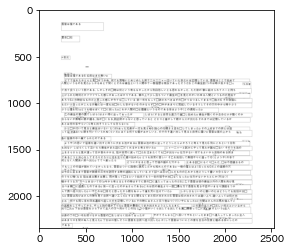

In [34]:
draw_text(text_im, results, IMAGE_PATH)

### 吾輩は猫である デジタル2

In [35]:
IMAGE_PATH = 'images/test6.png'

In [36]:
results = reader.readtext(IMAGE_PATH)

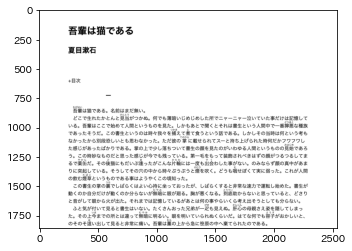

In [37]:
origin_im, detect_im, text_im = open_im(IMAGE_PATH)

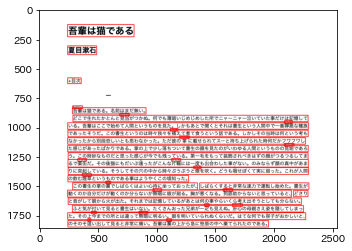

In [38]:
draw_detect(detect_im, results, IMAGE_PATH)

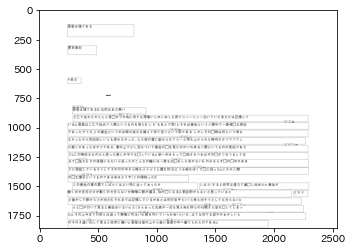

In [39]:
draw_text(text_im, results, IMAGE_PATH)

### 吾輩は猫である デジタル3

In [40]:
IMAGE_PATH = 'images/test7.png'

In [41]:
results = reader.readtext(IMAGE_PATH)

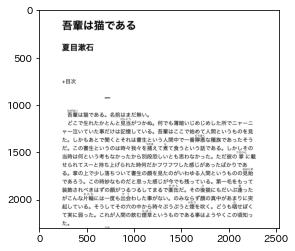

In [42]:
origin_im, detect_im, text_im = open_im(IMAGE_PATH)

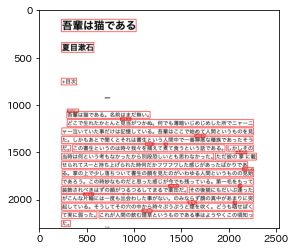

In [43]:
draw_detect(detect_im, results, IMAGE_PATH)

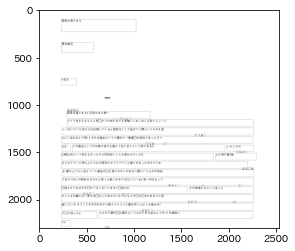

In [44]:
draw_text(text_im, results, IMAGE_PATH)

### 吾輩は猫である デジタル4

In [45]:
IMAGE_PATH = 'images/test8.png'

In [46]:
results = reader.readtext(IMAGE_PATH)

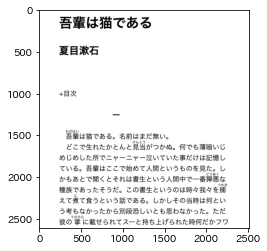

In [47]:
origin_im, detect_im, text_im = open_im(IMAGE_PATH)

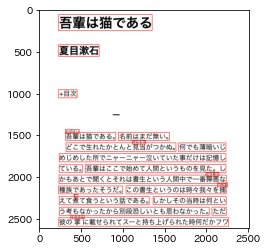

In [48]:
draw_detect(detect_im, results, IMAGE_PATH)

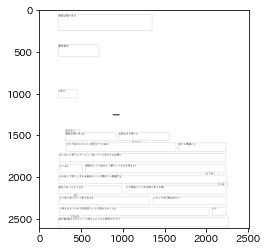

In [49]:
draw_text(text_im, results, IMAGE_PATH)